**Objetivos da aula:**

*   Conhecer o espaço de cor HSV
*   Conhecer o processo de mascara
*   conhecer o processo de detecção de contornos
*   conhecer o processo de calculo do centro de massa
*   conhecer o processo para desenar e escrever na imagem

### **Espaço de cor HSV**

Até o momento trabalhamos com imagens em escala de cinza, BGR, RGB e binaria. Agora vamos conhecer e trabalhar com HSV ou HSB. 

    H - hue (matriz)
    S - saturation (saturação)
    V - value (Value) ou B - brightness (brilho)

Utilizar esse espaço possui algumas vantagens vamos ver no exemplo abaixo. 

In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara
# o magenta tem h=300 mais ou menos ou 150 para a OpenCV
image_lower_hsv = np.array([70, 120, 190])  
image_upper_hsv = np.array([89, 255, 255])


mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

image_lower_hsv2 = np.array([0, 170, 50])
image_upper_hsv2 = np.array([5, 255, 255])


mask_hsv2 = cv2.inRange(img_hsv, image_lower_hsv2, image_upper_hsv2)

plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.subplot(2, 2, 2)
plt.imshow(mask_hsv, cmap="Greys_r", vmin=0, vmax=255)
plt.subplot(2, 2, 3)
plt.imshow(mask_hsv2, cmap="Greys_r", vmin=0, vmax=255)
plt.show()

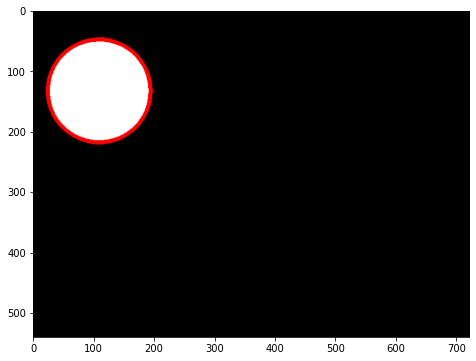

In [5]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread('circulo.png')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# Definição dos valores minimo e max da mascara
# o magenta tem h=300 mais ou menos ou 150 para a OpenCV
image_lower_hsv = np.array([70, 120, 190])  
image_upper_hsv = np.array([89, 255, 255])

mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)

image_lower_hsv2 = np.array([0, 170, 50])
image_upper_hsv2 = np.array([5, 255, 255])

mask_hsv2 = cv2.inRange(img_hsv, image_lower_hsv2, image_upper_hsv2)

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
contornos2, _ = cv2.findContours(mask_hsv2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
mask_rgb2 = cv2.cvtColor(mask_hsv2, cv2.COLOR_GRAY2RGB) 

contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"
contornos_img2 = mask_rgb2.copy() # Cópia da máscara para ser desenhada "por cima"

cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);
cv2.drawContours(contornos_img2, contornos2, -1, [255, 0, 0], 5);

plt.figure(figsize=(8,6))
plt.imshow(contornos_img);
plt.figure(figsize=(8,6))
plt.imshow(contornos_img2);

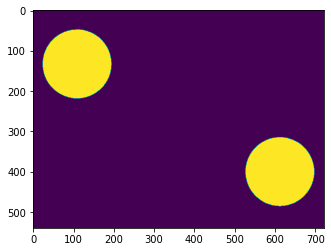

In [6]:
resultado = cv2.bitwise_or(mask_hsv,mask_hsv2)
plt.imshow(resultado)

In [7]:
# usando o exemplo da documentação https://docs.opencv.org/master/dd/d49/tutorial_py_contour_features.html
# notamos que a função devolve um dicionario. 

cnt = contornos[0]
cnt2 = contornos2[0]

M = cv2.moments(cnt)
M2 = cv2.moments(cnt2)
print( M )
print( M2 )

{'m00': 22626.0, 'm10': 2462886.5, 'm01': 3010441.5, 'm20': 308829047.5, 'm11': 327696948.6666666, 'm02': 441286815.8333333, 'm30': 42484383289.25, 'm21': 41091513130.5, 'm12': 48037406849.166664, 'm03': 69555309065.75, 'mu20': 40738801.23984575, 'mu11': 4217.764618098736, 'mu02': 40740628.92790371, 'mu30': -1295977.7528915405, 'mu21': 177642.54157066345, 'mu12': 1309615.4006490707, 'mu03': -189206.5406036377, 'nu20': 0.07957793768656633, 'nu11': 8.238853371742862e-06, 'nu02': 0.07958150783693797, 'nu30': -1.682976645699165e-05, 'nu21': 2.3068933712713975e-06, 'nu12': 1.7006867048625923e-05, 'nu03': -2.45706524158291e-06}
{'m00': 22601.0, 'm10': 13832452.5, 'm01': 9036291.0, 'm20': 8506543333.0, 'm11': 5530466610.916666, 'm02': 3653482590.833333, 'm30': 5256053220701.25, 'm21': 3401072439550.5835, 'm12': 2236034954405.0835, 'm03': 1493200180613.5, 'mu20': 40690398.84857845, 'mu11': 435.36348247528076, 'mu02': 40609043.79200745, 'mu30': 275633.6767578125, 'mu21': 1115034.531030655, 'mu1

In [8]:
# Calculo das coordenadas do centro de massa

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

cx2 = int(M2['m10']/M['m00'])
cy2 = int(M2['m01']/M['m00'])

print("centro de massa na possição: ",cx, cy)
print("centro de massa na possição: ",cx2, cy2)

centro de massa na possição:  108 133
centro de massa na possição:  611 399


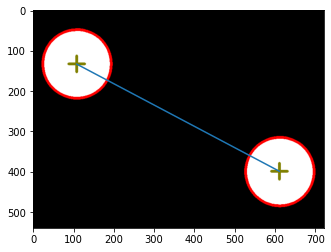

In [12]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

cnt = contornos[0]
cnt2 = contornos2[0]
size = 20
color = (128,128,0)

M = cv2.moments(cnt)
M2 = cv2.moments(cnt2)

cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

cx2 = int(M2['m10']/M['m00'])
cy2 = int(M2['m01']/M['m00'])

cv2.line(contornos_img,(cx - size,cy),(cx + size,cy),color,5)
cv2.line(contornos_img,(cx,cy - size),(cx, cy + size),color,5)

cv2.line(contornos_img2,(cx2 - size,cy2),(cx2 + size,cy2),color,5)
cv2.line(contornos_img2,(cx2,cy2 - size),(cx2, cy2 + size),color,5)

resultado = cv2.bitwise_or(contornos_img,contornos_img2)
plt.imshow(resultado)

plt.plot([cx,cx2],[cy,cy2])



In [13]:
import math

In [14]:
y = (cy - cy2)
x = (cx - cx2)
angulo = math.atan2(y, x)
print(angulo)

-2.6551502513493035


In [15]:
import numpy
print(numpy.degrees(angulo))

-152.1289033754148
